# Import Package

In [1]:
#dataframe
import pandas as pd

#computation
import numpy as np


#NLP lib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# string operations
import string 
import re

# general imports
import math
from scipy.sparse import csr_matrix


#visualization
import matplotlib.pyplot as plt

#others
import collections
from collections import Counter
import itertools
from itertools import islice
from itertools import chain
import pickle

#pre-build package
from utils import *
from Invertedfile_TFIDF import Invertedfile_TFIDF

#auto reload
%load_ext autoreload
%autoreload 2

# Load Data

In [2]:
df = pd.read_csv('data.tsv', sep='\t',error_bad_lines=False)
df.head()

/opt/anaconda3/envs/nlp_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 83032: expected 6 fields, saw 7\n'
b'Skipping line 154657: expected 6 fields, saw 7\n'
b'Skipping line 323916: expected 6 fields, saw 7\n'
/opt/anaconda3/envs/nlp_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,qid1,qid2,question1,question2,is_duplicate
0,133273,213221,213222.0,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...,0.0
1,402555,536040,536041.0,How do I control my horny emotions?,How do you control your horniness?,1.0
2,360472,364011,490273.0,What causes stool color to change to yellow?,What can cause stool to come out as little balls?,0.0
3,150662,155721,7256.0,What can one do after MBBS?,What do i do after my MBBS ?,1.0
4,183004,279958,279959.0,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be...",0.0


In [3]:
df.dropna(inplace=True)
#drop rows with dupplication
df = df.drop_duplicates(subset = ['question1'], keep = 'last')
df = df.drop_duplicates(subset = ['question2'], keep = 'last')
df.nunique()

id              232203
qid1            232203
qid2            232202
question1       232203
question2       232203
is_duplicate         2
dtype: int64

<AxesSubplot:>

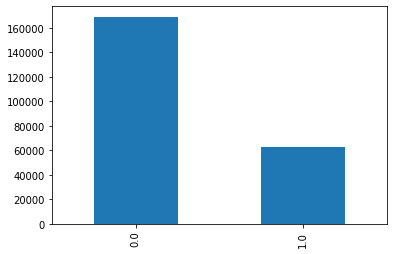

In [4]:
df['is_duplicate'].value_counts().plot(kind='bar')

### Test Set

In [5]:
df.reset_index(inplace=True)

In [6]:
#Get the first 100 "is duplicate" rows for testing
df_test = df[df['is_duplicate'] == 1].iloc[:100]
df_test.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
1,1,402555,536040,536041.0,How do I control my horny emotions?,How do you control your horniness?,1.0
6,13,11568,22332,22333.0,Which is the best book to study TENSOR for gen...,Which is the best book for tensor calculus?,1.0
11,24,33995,62359,62360.0,How does an IQ test work and what is determine...,How does IQ test works?,1.0
12,25,244506,357159,357160.0,Is it safe to use Xiaomi mobile phones?,Is it safe or unsafe to use Xiaomi Products?,1.0
14,27,375073,506056,506057.0,What are the best books on cosmology?,Which is the best book for cosmology?,1.0


# Text Preprocessing

In [7]:
df['processed_ques2'] = df.question2.apply(lambda x: text_preprocessing(x))


# TFIDF with Inverted File

In [8]:
model1 = Invertedfile_TFIDF(df[:5000])

Build vocabulary...
Build TF-IDF matrix...
Build inverted file...
Model is ready to query!


In [9]:
top2  = model1.accuracy(df_test, 2) 
top5  = model1.accuracy(df_test, 5) 

print("Accuracy with k = 2: ", top2)
print("Accuracy wit k = 5: ", top5)

Accuracy with k = 2:  0.9
Accuracy wit k = 5:  0.97


In [10]:
model1.query_engine()

Your query is: asdasd as
 How can I get the absolute best deal on a cruise? - 2.45754247590989
-----------------------------------------------------


# Averaging Word Embedding